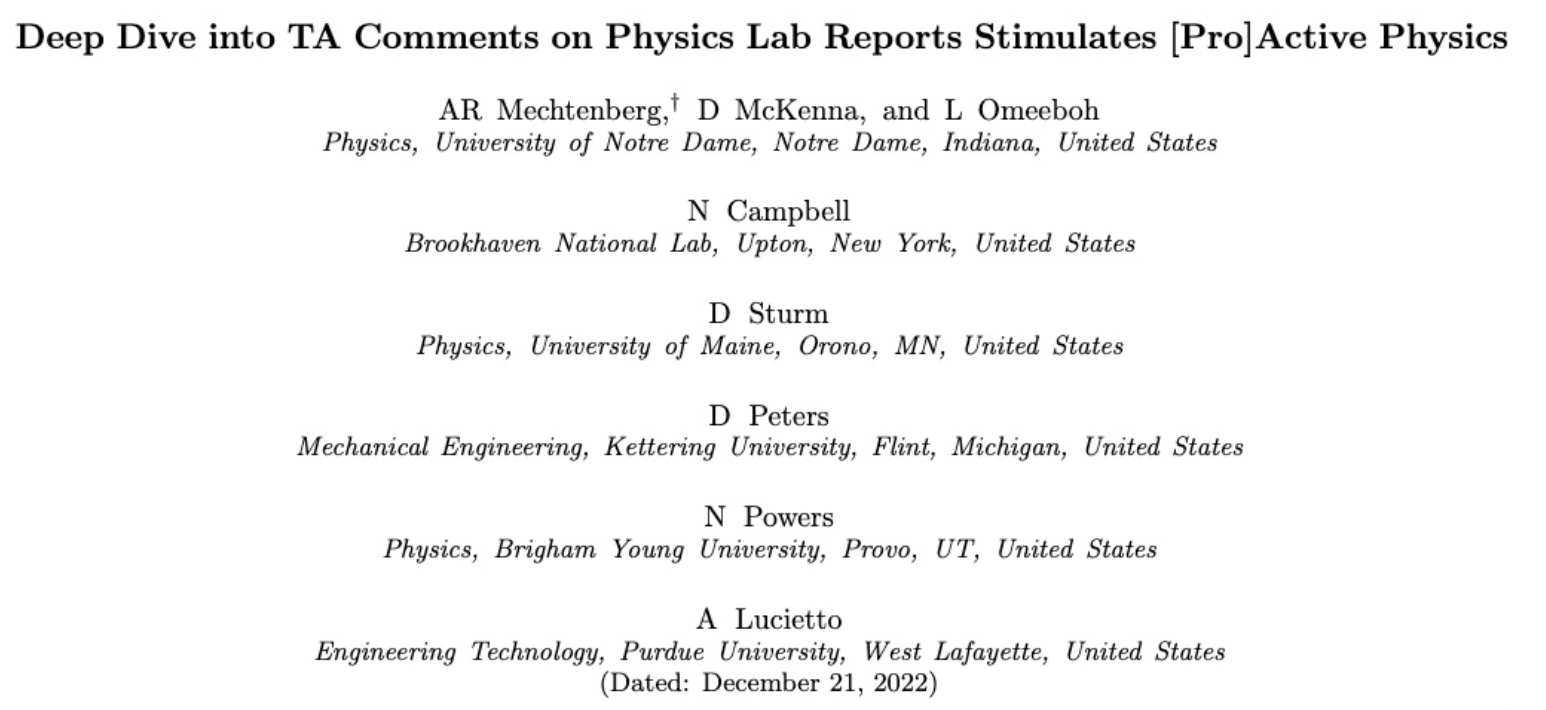

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame

In [ ]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 318 (delta 107), reused 137 (delta 53), pack-reused 113 (from 1)
Receiving objects: 100% (318/318), 31.98 MiB | 24.48 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [ ]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [ ]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [ ]:
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

data_group4_df = pd.read_excel(path_to_colab / 'Paper_1/data_group4.xlsx', header = 0,sheet_name = 'Sheet1')
data_group4_np = data_group4_df.to_numpy()

#print(data_group4_df)

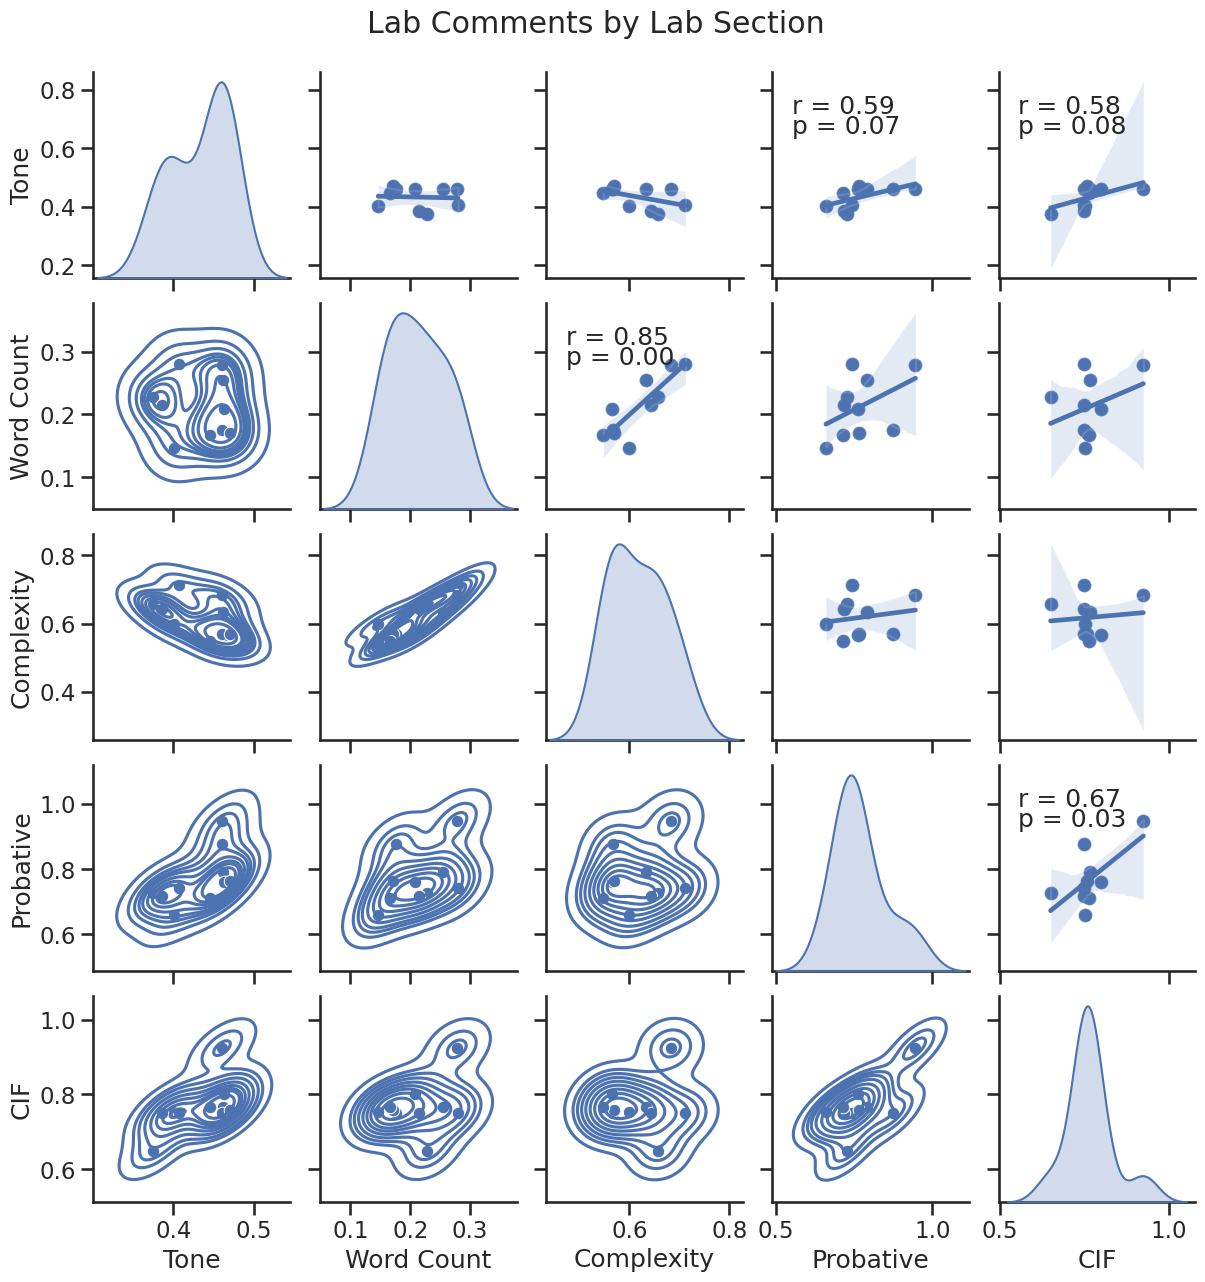

In [ ]:
sns.set_context('talk')

CIF_matrix = data_group2_df[['Tone','Word Count','Complexity','Probative','CIF']]

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    if p < 0.1:
      ax = plt.gca()
      ax.annotate("r = {:.2f}".format(r), xy=(0.1, .8), xycoords=ax.transAxes)
      ax.annotate("p = {:.2f}".format(p), xy=(0.1, .7), xycoords=ax.transAxes)
    else:
      return()

g = sns.pairplot(CIF_matrix[['Tone','Word Count','Complexity','Probative','CIF']], diag_kind="kde")
g.fig.suptitle('Lab Comments by Lab Section', y=1.03)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_upper(corrfunc)
#

plt.savefig('Potentially_Predicting_CIFs.png')